# Aplicações de Aprendizado Profundo com TensorFlow

### Treinando modelo de classificação de imagens

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

2025-05-14 16:22:40.777108: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 16:22:40.780793: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 16:22:40.788903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747250560.802541   34069 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747250560.806370   34069 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747250560.817872   34069 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
print('[INFO] accessing MNIST...')
((trainX, trainY), (testX, testY)) = mnist.load_data()

[INFO] accessing MNIST...


In [3]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

In [4]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [5]:

model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

/home/breia/lab/estudos/faculdade/bigdata/pyspark/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1747250564.523503   34069 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1747250564.524100   34069 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=100, batch_size=128)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1399 - loss: 2.3029 - val_accuracy: 0.3961 - val_loss: 2.2439
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3776 - loss: 2.2303 - val_accuracy: 0.4871 - val_loss: 2.1738
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4943 - loss: 2.1561 - val_accuracy: 0.6325 - val_loss: 2.0769
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6085 - loss: 2.0517 - val_accuracy: 0.6360 - val_loss: 1.9346
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6333 - loss: 1.8961 - val_accuracy: 0.6752 - val_loss: 1.7359
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6665 - loss: 1.6925 - val_accuracy: 0.7217 - val_loss: 1.5060
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7075 - loss: 1.4704 - val_accuracy: 0.7360 - val_loss: 1.2914
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7371 - loss: 1.2633 - val_accu

In [7]:
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

 1/79 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.90      0.87      0.88       892
           6       0.93      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.89      0.89      0.89       974
           9       0.91      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



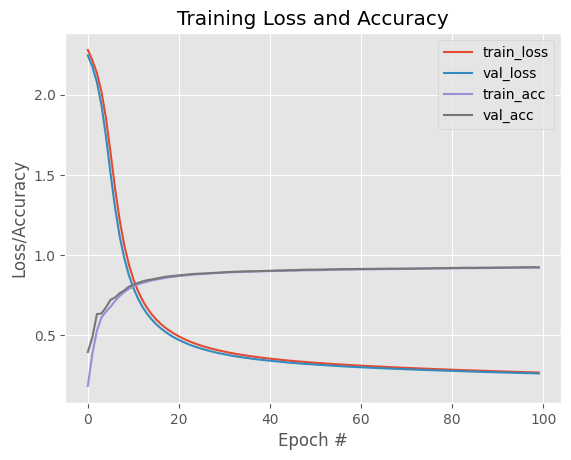

In [8]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 100), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, 100), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, 100), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0, 100), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()